In [98]:
#Task-1 Time Series Analysis
# The objective of this project is to Analyze sales data over time and forecast future sales using statistical models.
# For this project we use libraries like Numpy, pandas, matplotlib, seaborn
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# This section is to suppresses warnings generated by the code:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


In [99]:
# Dataset selection
# We will use sales data. The dataset is taken from(https://www.kaggle.com/c/store-sales-time-series-forecasting/data?select=train.csv) froma provide source and is avaliable on kaggle.The dataset contains columns such as 
# Path to file
file_path = "C:/Users/ganga/Downloads/train.csv.zip"
# Open the Csv file and load the specific csv file into specific dataframe
with zipfile.ZipFile(file_path,'r') as customer_data:
    customer_data.printdir()
    # Extract the file that we want to read
    sales_file = 'train.csv'    # This is the specific file we want to read
    # Reading the specific file directly from the zip archive
    with customer_data.open(sales_file) as my_file:
        df = pd.read_csv(my_file, parse_dates=['date'], index_col='date')   # Loading the dataset

File Name                                             Modified             Size
train.csv                                      2021-11-22 20:13:44    121800373


In [100]:
# Display the first five rows of the dataset
print(f'first five rows of the dataset are\n {df.head()}')

first five rows of the dataset are
             id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0


In [101]:
# Check for missing values
print("\n Missing values:")
print(df.isnull().sum())


 Missing values:
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


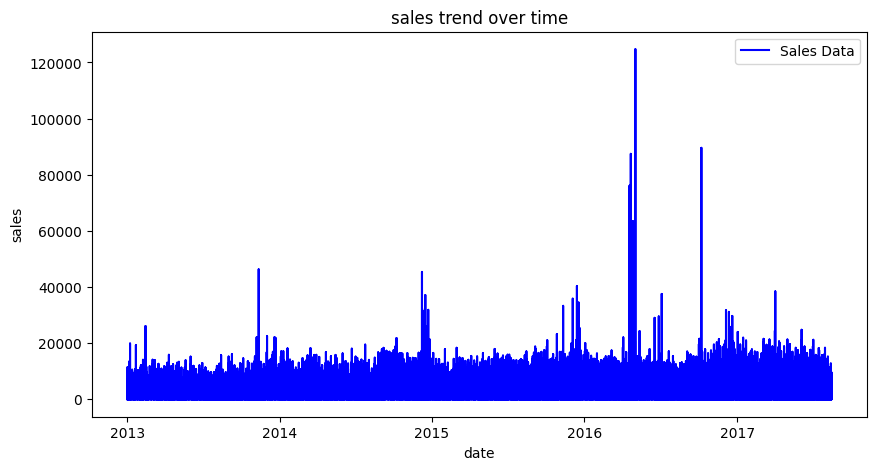

In [102]:
# Visualize sales trend over time
# plot sales over time
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sales'], label='Sales Data', color='blue')
plt.xlabel('date')
plt.ylabel('sales')
plt.title("sales trend over time")
plt.legend()
plt.show()

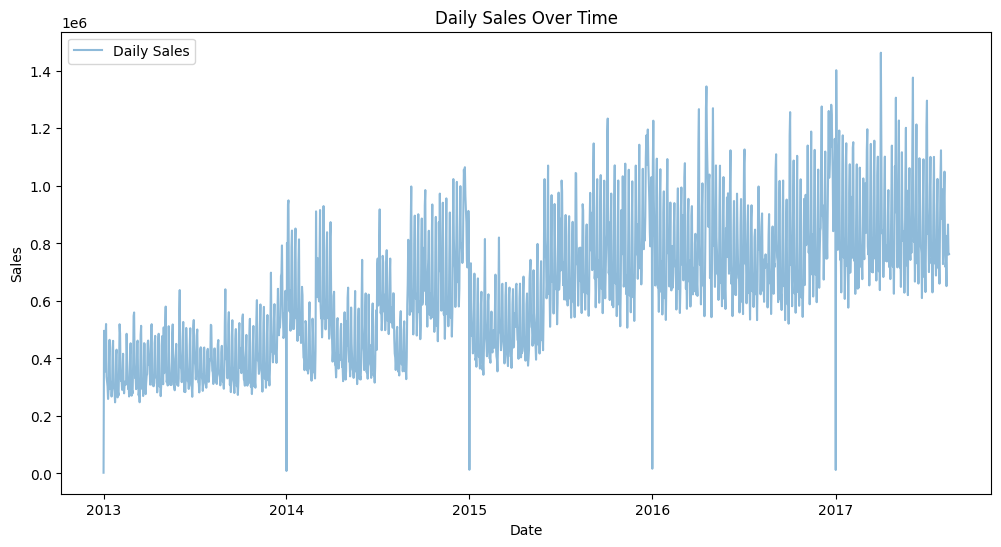

In [103]:
# Using line charts or moving averages to observe fluctuations over time. 
# Remove the existing 'date' column 
df = df.drop(columns=['date'], errors='ignore')

# Reset the index 
df = df.reset_index()

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date and calculate total sales for each date
daily_sales = df.groupby('date')['sales'].sum()

# Plotting the daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', alpha=0.5)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



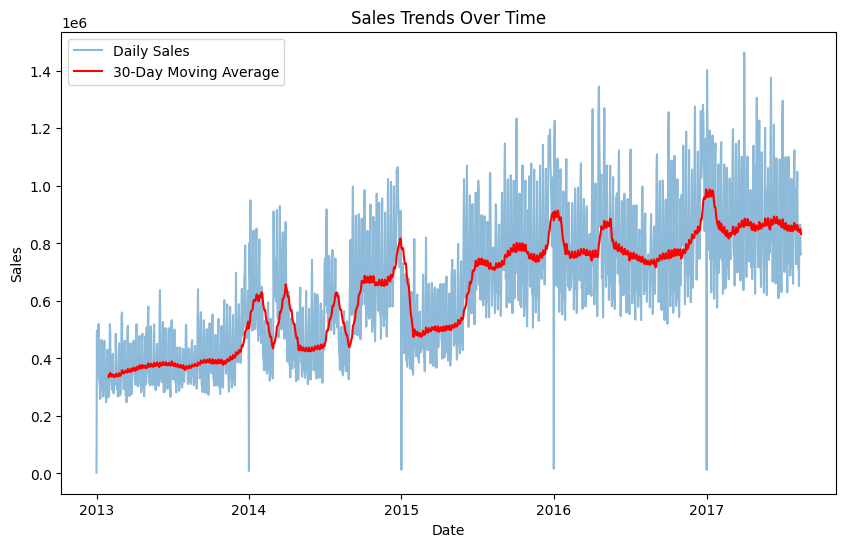

In [104]:
# Calculate a 30-day moving average of the sales
moving_avg = daily_sales.rolling(window=30).mean()

# Plotting the 30-day moving average
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales', alpha=0.5)
plt.plot(moving_avg.index, moving_avg.values, label='30-Day Moving Average', color='red')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [105]:
# Checking stattionary(Dickey-Fuller Test)
# Sample the data to reduce size
sample_size = 10000     #adjusting the sample size
df_sample = df.sample(n=sample_size, random_state=1)

#Perform Dickey-Fuller test
result = adfuller(df_sample['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

if result[1] > 0.05:
    print("The data is nin stationary. Difffernecing is needed.")
else:
    print("The data is stationary. No need for differencing.")




ADF Statistic: -99.4898609747804
P-Value: 0.0
The data is stationary. No need for differencing.


In [106]:
from statsmodels.tsa.arima.model import ARIMA
#Fit ARIMA Model(assuming p=2,d=1,q=2 based on ACF/PACF)
# Sample the data since it's too large
sample_df = df['sales'].sample(frac=0.1)

# Build and fit a simpler ARIMA model
model = ARIMA(sample_df, order=(2,1,2))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:               300089
Model:                 ARIMA(2, 1, 2)   Log Likelihood            -2529320.748
Date:                Wed, 12 Feb 2025   AIC                        5058651.497
Time:                        16:18:44   BIC                        5058704.556
Sample:                             0   HQIC                       5058666.843
                             - 300089                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0003      0.002   -466.528      0.000      -1.004      -0.996
ar.L2         -0.0003      0.002     -0.144      0.885      -0.004       0.003
ma.L1      -2.397e-06      0.001     -0.002      0.9

In [107]:
#Forecast next 10 periods
forecast = model_fit.forecast(steps=10)
print("Forecasted sales for next 10 periods:\n", forecast)

Forecasted sales for next 10 periods:
 300089    360.216991
300090    360.338644
300091    360.121259
300092    360.338669
300093    360.121259
300094    360.338669
300095    360.121260
300096    360.338668
300097    360.121260
300098    360.338667
Name: predicted_mean, dtype: float64


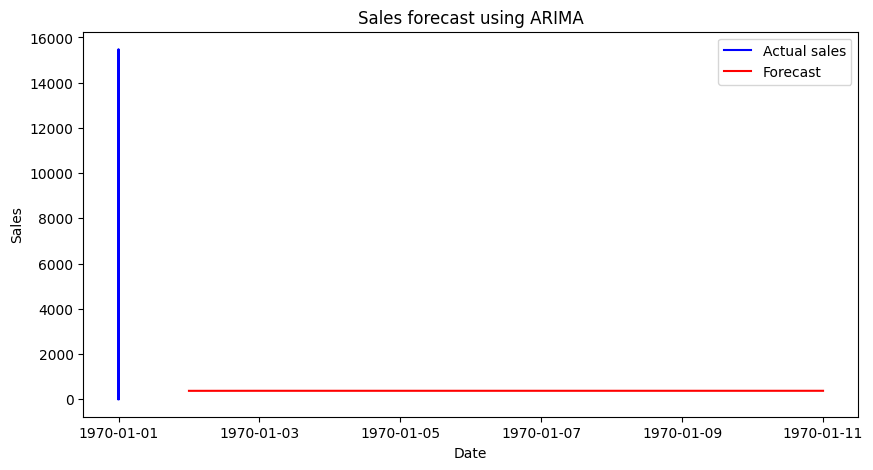

In [ ]:
# Forecasting plot displaying the predicted sales alongside actual sales for comparison.
df_sample.index = pd.to_datetime(df_sample.index)  #Ensuring the index to datetime object

# Plot original and forecasted sales
plt.figure(figsize=(10,5))
plt.plot(df_sample.index, df_sample['sales'], label='Actual sales', color='blue')

last_date = df_sample.index[-1]  # Checking forecast_index is within the valid range
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10, freq='D')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Sales forecast using ARIMA")
plt.legend()
plt.show()
